In [1]:
from Algorithm import *
import matplotlib.pyplot as plt

plt.rcParams['text.usetex'] = True
plt.rcParams["font.family"]= "serif"
plt.rc('text.latex', preamble=r'\usepackage{bm}')
plt.rcParams['figure.dpi'] = 400

In [2]:
Newton = OPENM(5)
Lang = Lagrangian(5)
Mosp = MOSP(5)
prob2 = ConvNetFlow(5)
prob = ExpNetFlow(5)

inc = prob.subIncrement
inc2 = prob2.subIncrement

A = np.array([[-1,1,1,0,0],[0,-1,0,1,0],[0,0,-1,0,1],[0,0,0,-1,-1]], dtype='float64')
print(A.shape)
b = np.array([-10, -5, -11, -25], dtype='float64').reshape((4,1))
prob2.setA(A)
prob2.setb(b)
prob.setA(A)
prob.setb(b)
prob2.alpha = np.array([[1],[1],[1],[1],[2]])
#prob.alpha = np.array([[1],[1],[1],[0.1],[3000]])

(4, 5)


In [3]:
t = []
rN = []
rM = []
opt = []
regretN = 0
regretM = 0
T = 0
for i in range(1):
    T += 1
    Newton.update(prob)
    Lang.update(prob)
    optimal = prob.optimal()[0]
    regretN += np.abs(optimal - Newton.eval(prob))
    regretM += np.abs(optimal - Lang.eval(prob))
    t.append(T)
    rN.append(regretN)
    rM.append(regretM)
    opt.append(optimal)
    #prob2.randomIncrement()


[[49.26842939]
 [65.65595344]
 [71.1954592 ]
 [85.22821327]
 [ 0.        ]]


In [12]:
for i in range(100):
    T += 1
    Newton.update(prob)
    Lang.update(prob)
    optimal = prob.optimal()[0]
    regretN += np.abs(optimal - Newton.eval(prob))
    regretM += np.abs(optimal - Lang.eval(prob))
    t.append(T)
    rN.append(regretN)
    rM.append(regretM)
    opt.append(optimal)
    #prob.subIncrement()

In [31]:
Lang.update(prob)

[[43.34739977]
 [ 0.        ]
 [ 0.        ]
 [43.53254595]
 [ 0.        ]]


[53.70096473744636,
 22.74219158661911,
 25.293513128008673,
 12.05603757475642,
 8.59070783013437]

<function matplotlib.pyplot.show(close=None, block=None)>

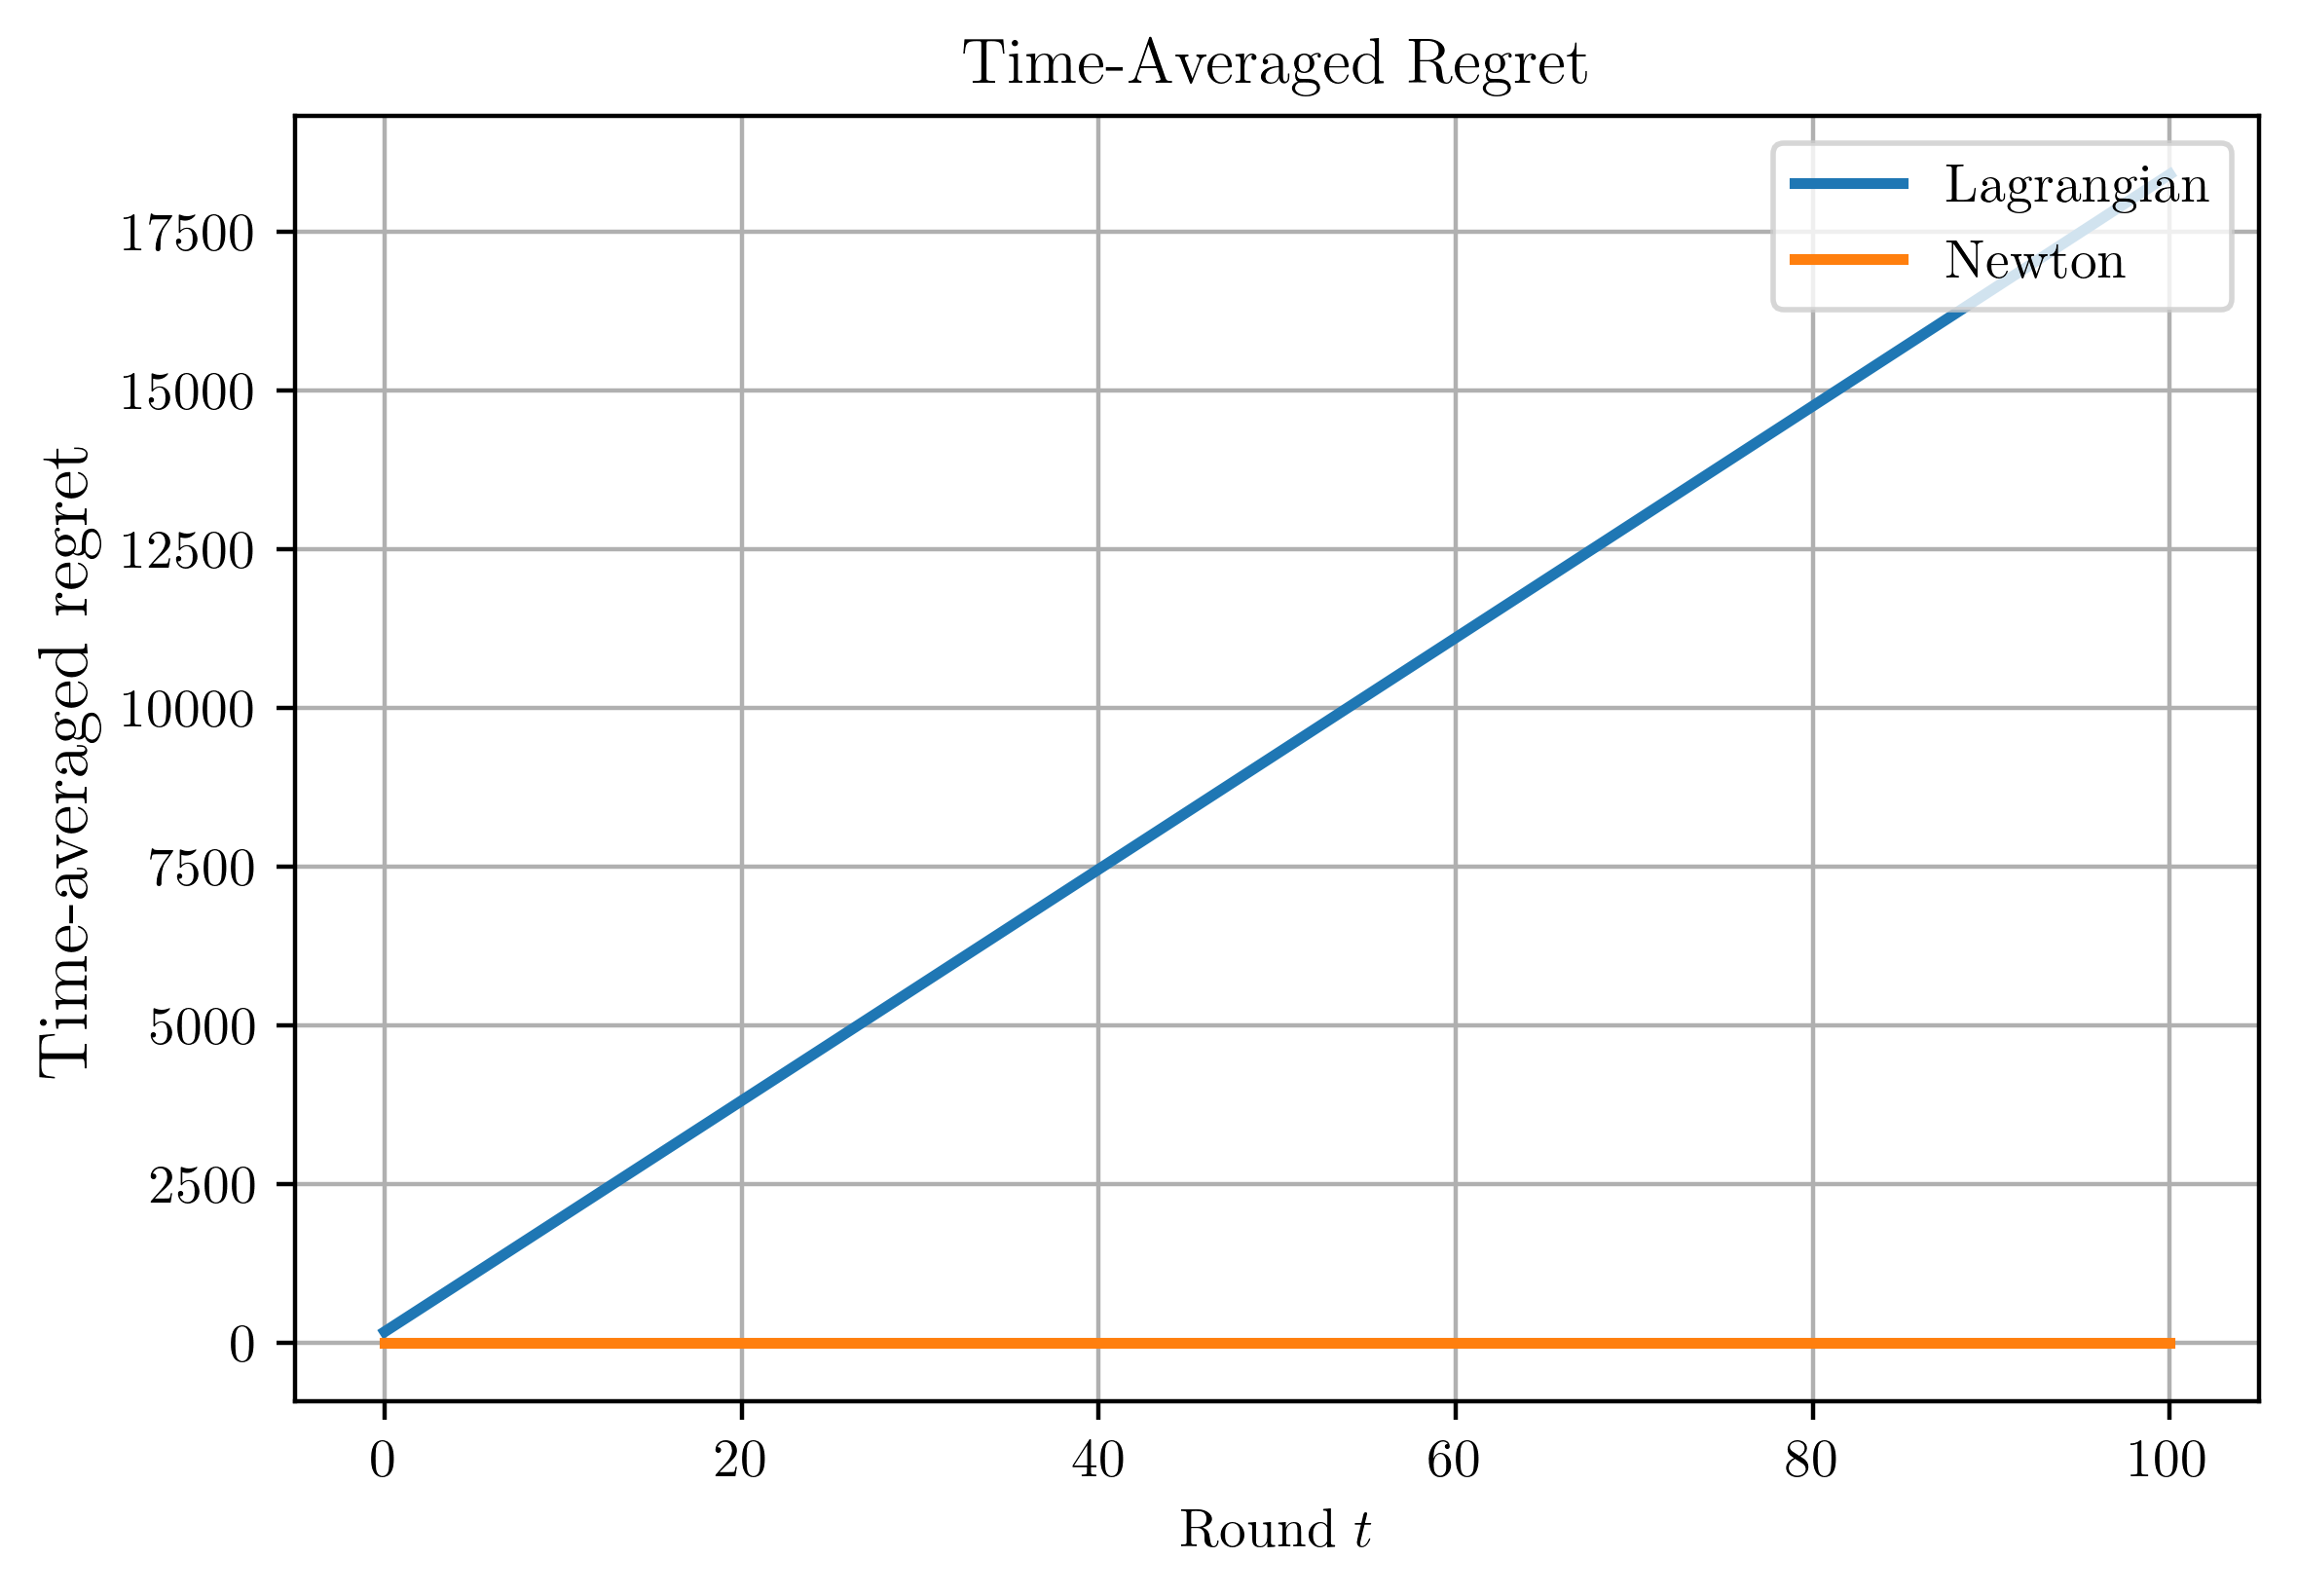

In [15]:
plt.rcParams['text.usetex'] = True
plt.rcParams["font.family"]= "serif"
plt.rc('text.latex', preamble=r'\usepackage{bm}')
plt.figure(93)
plt.plot(np.arange(0,T), rM,linewidth=2.0,label=r'Lagrangian')
plt.plot(np.arange(0, T), rN, linewidth=2.0,label=r'Newton')

#plt.plot(np.arange(0,T), DR_D,linewidth=2.0,label=r'RBV-OGD w/o $\mathcal{R}$')
#plt.plot(np.arange(0,T), DR_star,'.',linewidth=2.0,label=r'$\mathbf{p}_t^\top\mathbf{x}_t^\star$')
#plt.plot(np.arange(0,T), DR_binary,'.',linewidth=2.0,label=r'$\mathbf{b}_t^\star$')
#plt.plot(np.arange(0,T), st,'--',linewidth=2.0,label=r'$s_t$')
#plt.plot(np.arange(0,T), un_control,':',linewidth=2.0,label=r'$\tilde{\mathbf{p}}_t^\top \mathbf{u}_t$')
#plt.plot(np.arange(0,T), DR_noLO,linewidth=2.0,label=r'w/o lock-out')
plt.legend(loc=1)
plt.grid()
plt.ylabel(r'Time-averaged regret', fontsize=13)
plt.xlabel(r'Round $t$')
plt.tight_layout()
plt.autoscale(enable=True, axis='x', tight=False)
#plt.autoscale(enable=True, axis='y', tight=True)
#plt.savefig('Figures/DR_bis.pdf', format='pdf', dpi=300)
plt.title("Time-Averaged Regret")
plt.show 

In [3]:
bench2 = Benchmark(prob2, MOSPBasic, OPENM, Lagrangian)
bench = Benchmark(prob, OPENM, MOSPBasic, Lagrangian)

In [6]:
bench.increment(inc, 600)

In [13]:
bench2.increment(inc2, 900)

In [4]:
bench += 900

Set parameter Username
Academic license - for non-commercial use only - expires 2023-01-30


(-50.0, 1200.0)

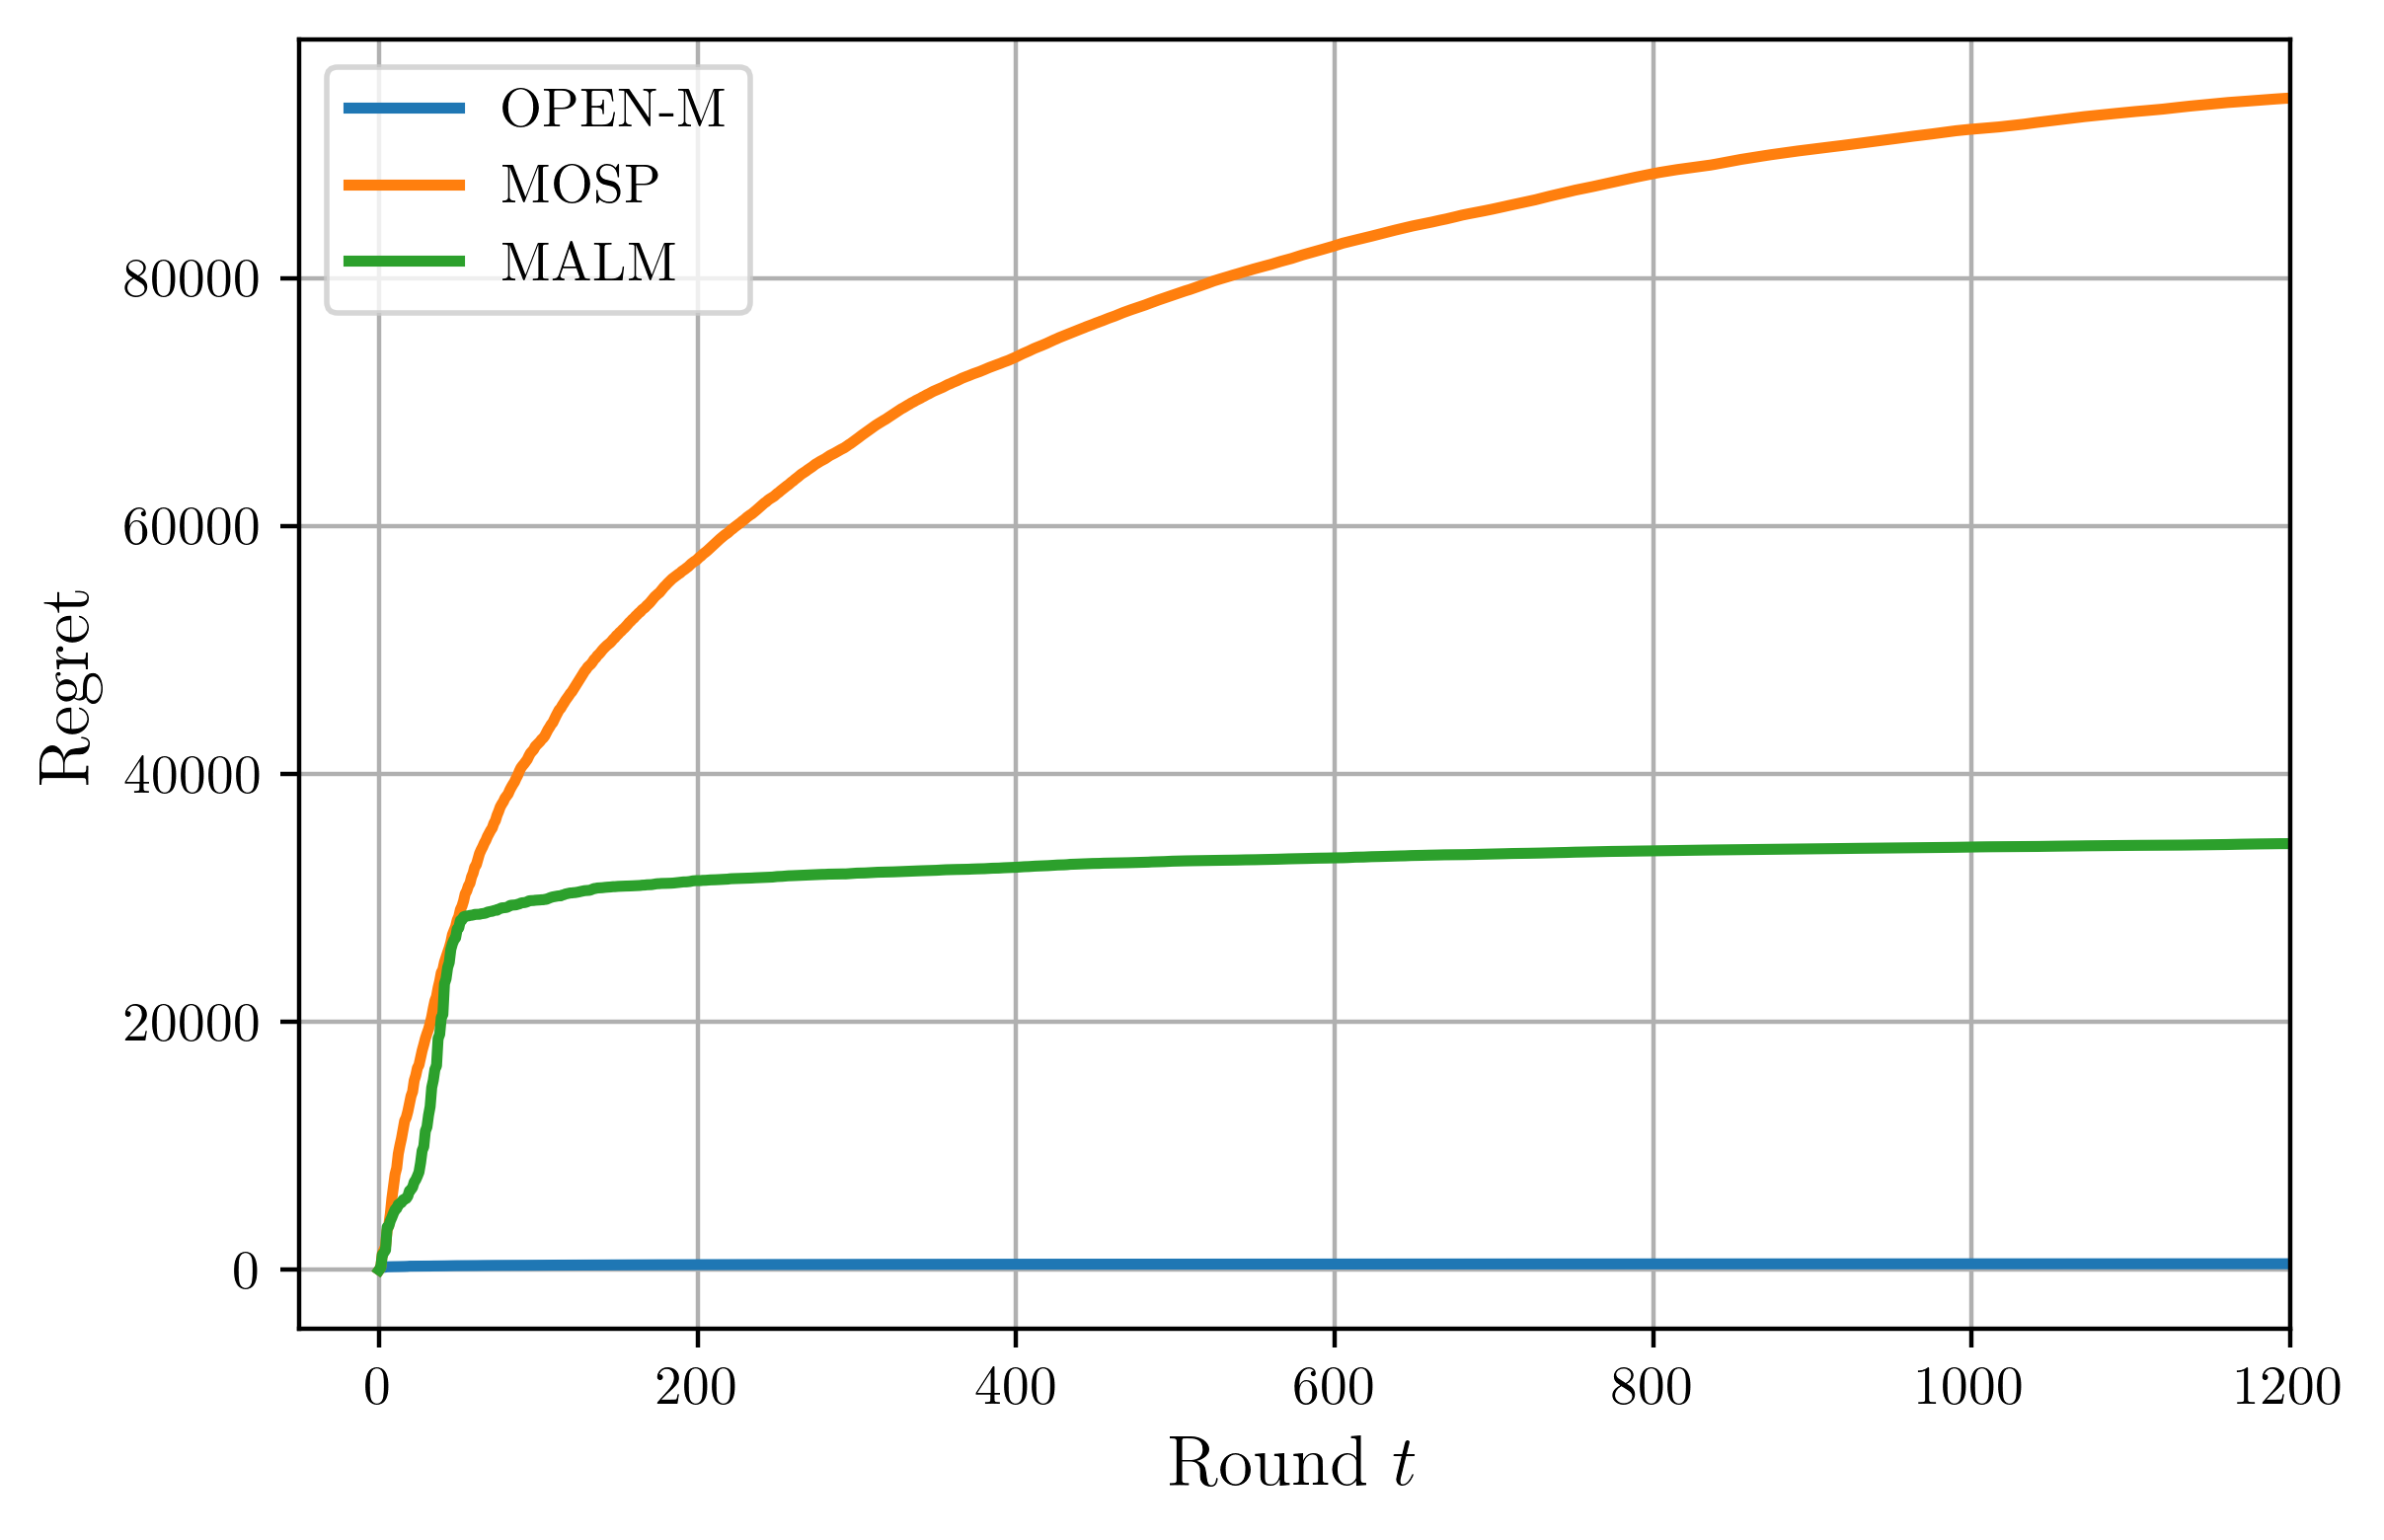

In [7]:
bench.plotRegret()

plt.legend(loc=2)
plt.grid()
plt.ylabel(r'Regret', fontsize=13)
plt.xlabel(r'Round $t$', fontsize=13)
plt.tight_layout()
plt.autoscale(enable=True, axis='x', tight=False)
plt.xlim(-50,1200)


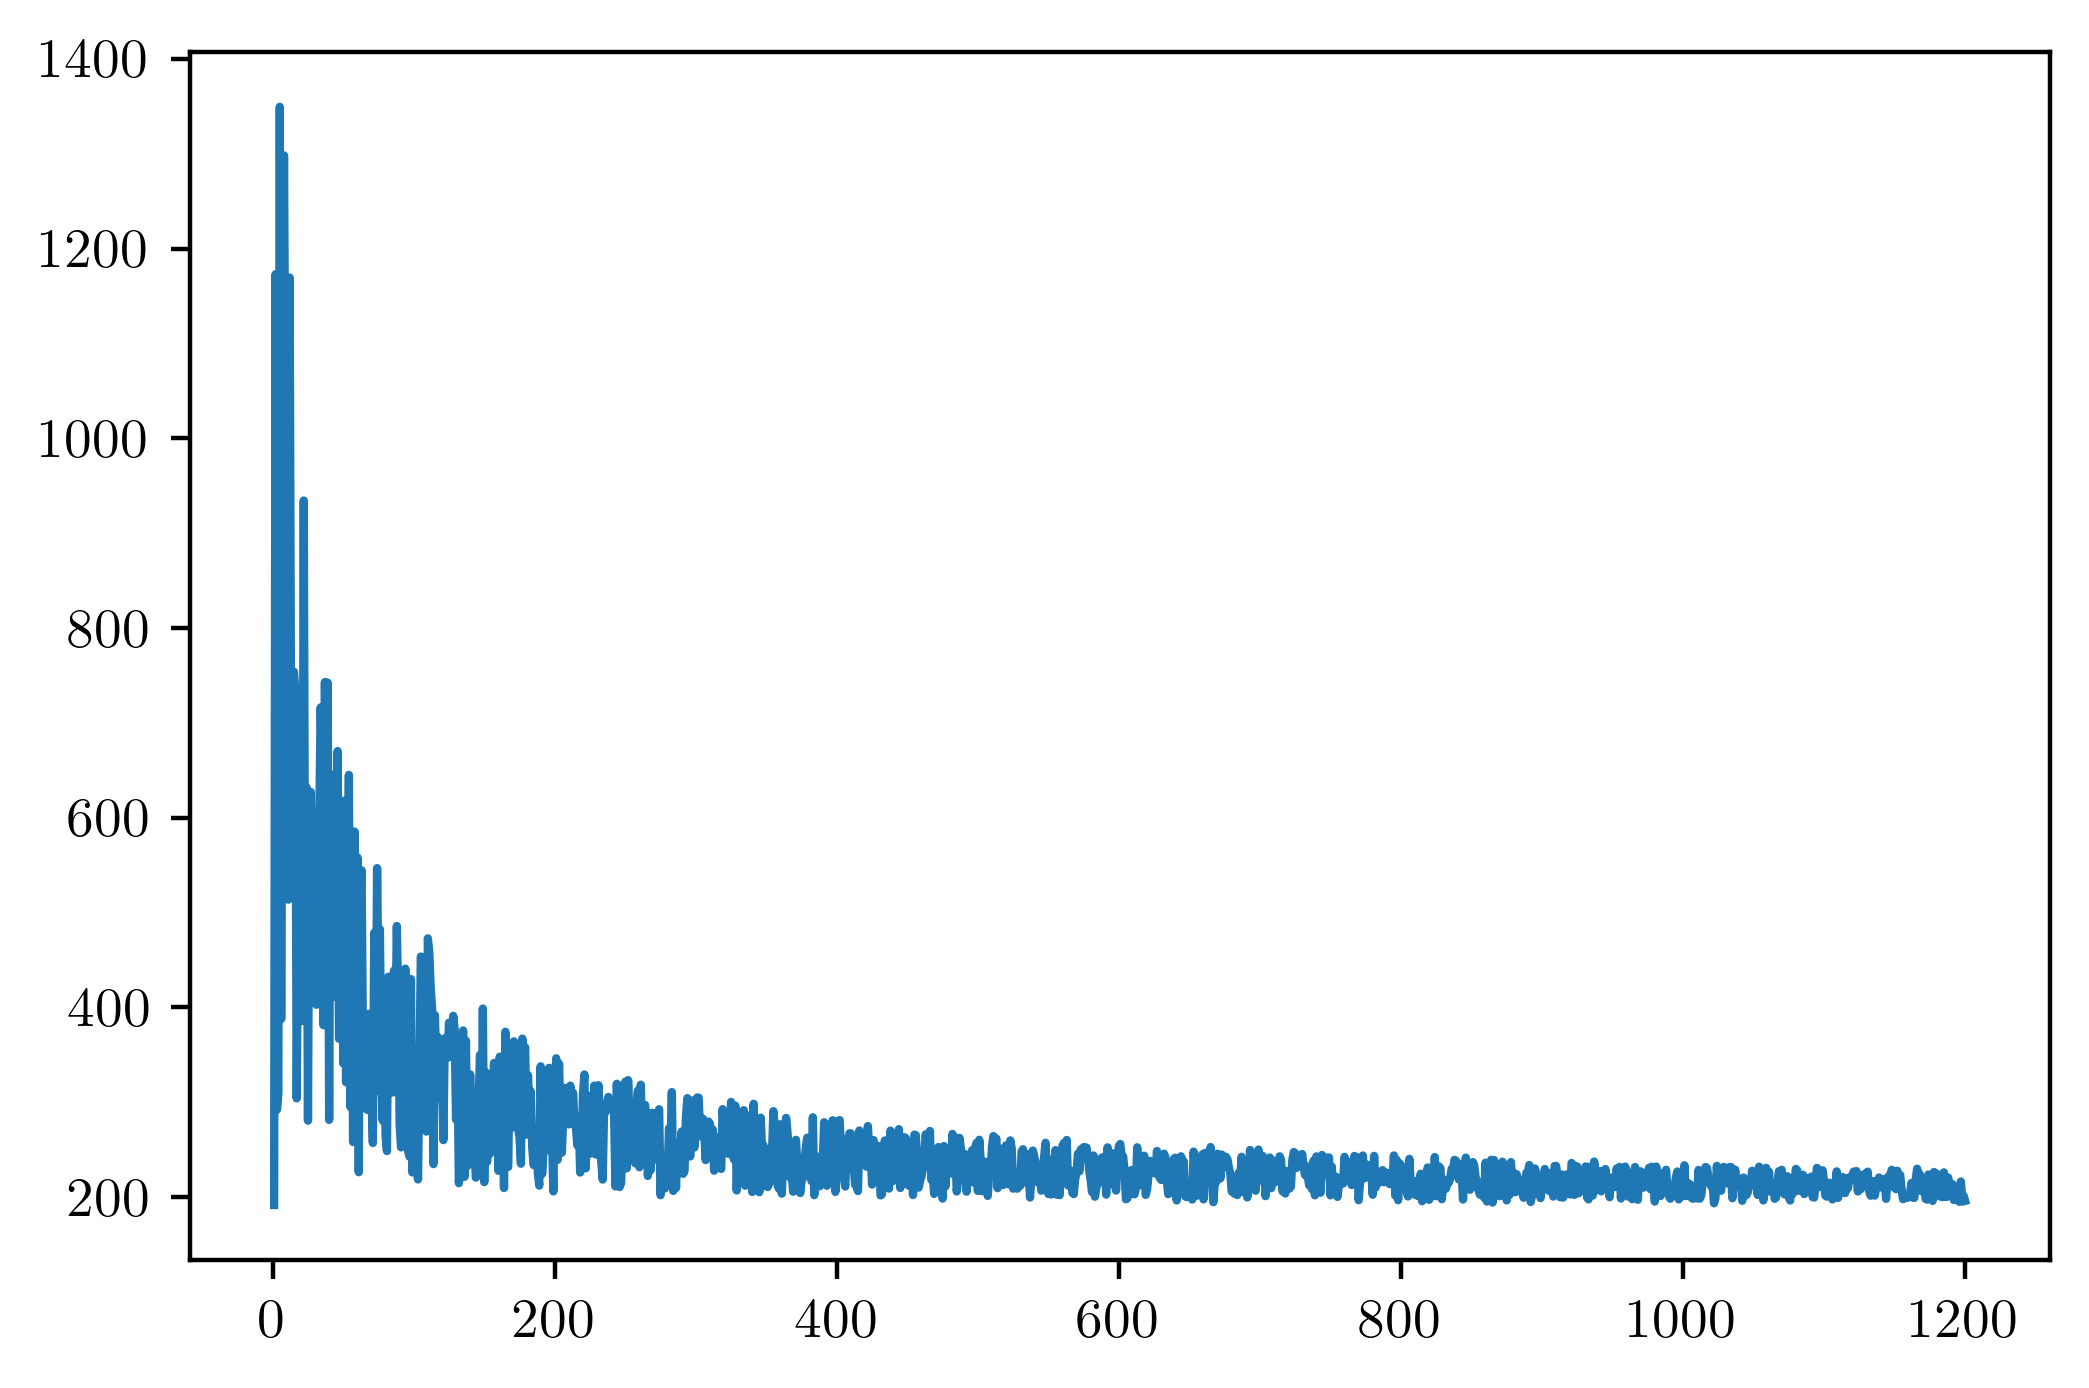

In [8]:
bench.plotOptimal()

(0.0, 600.0)

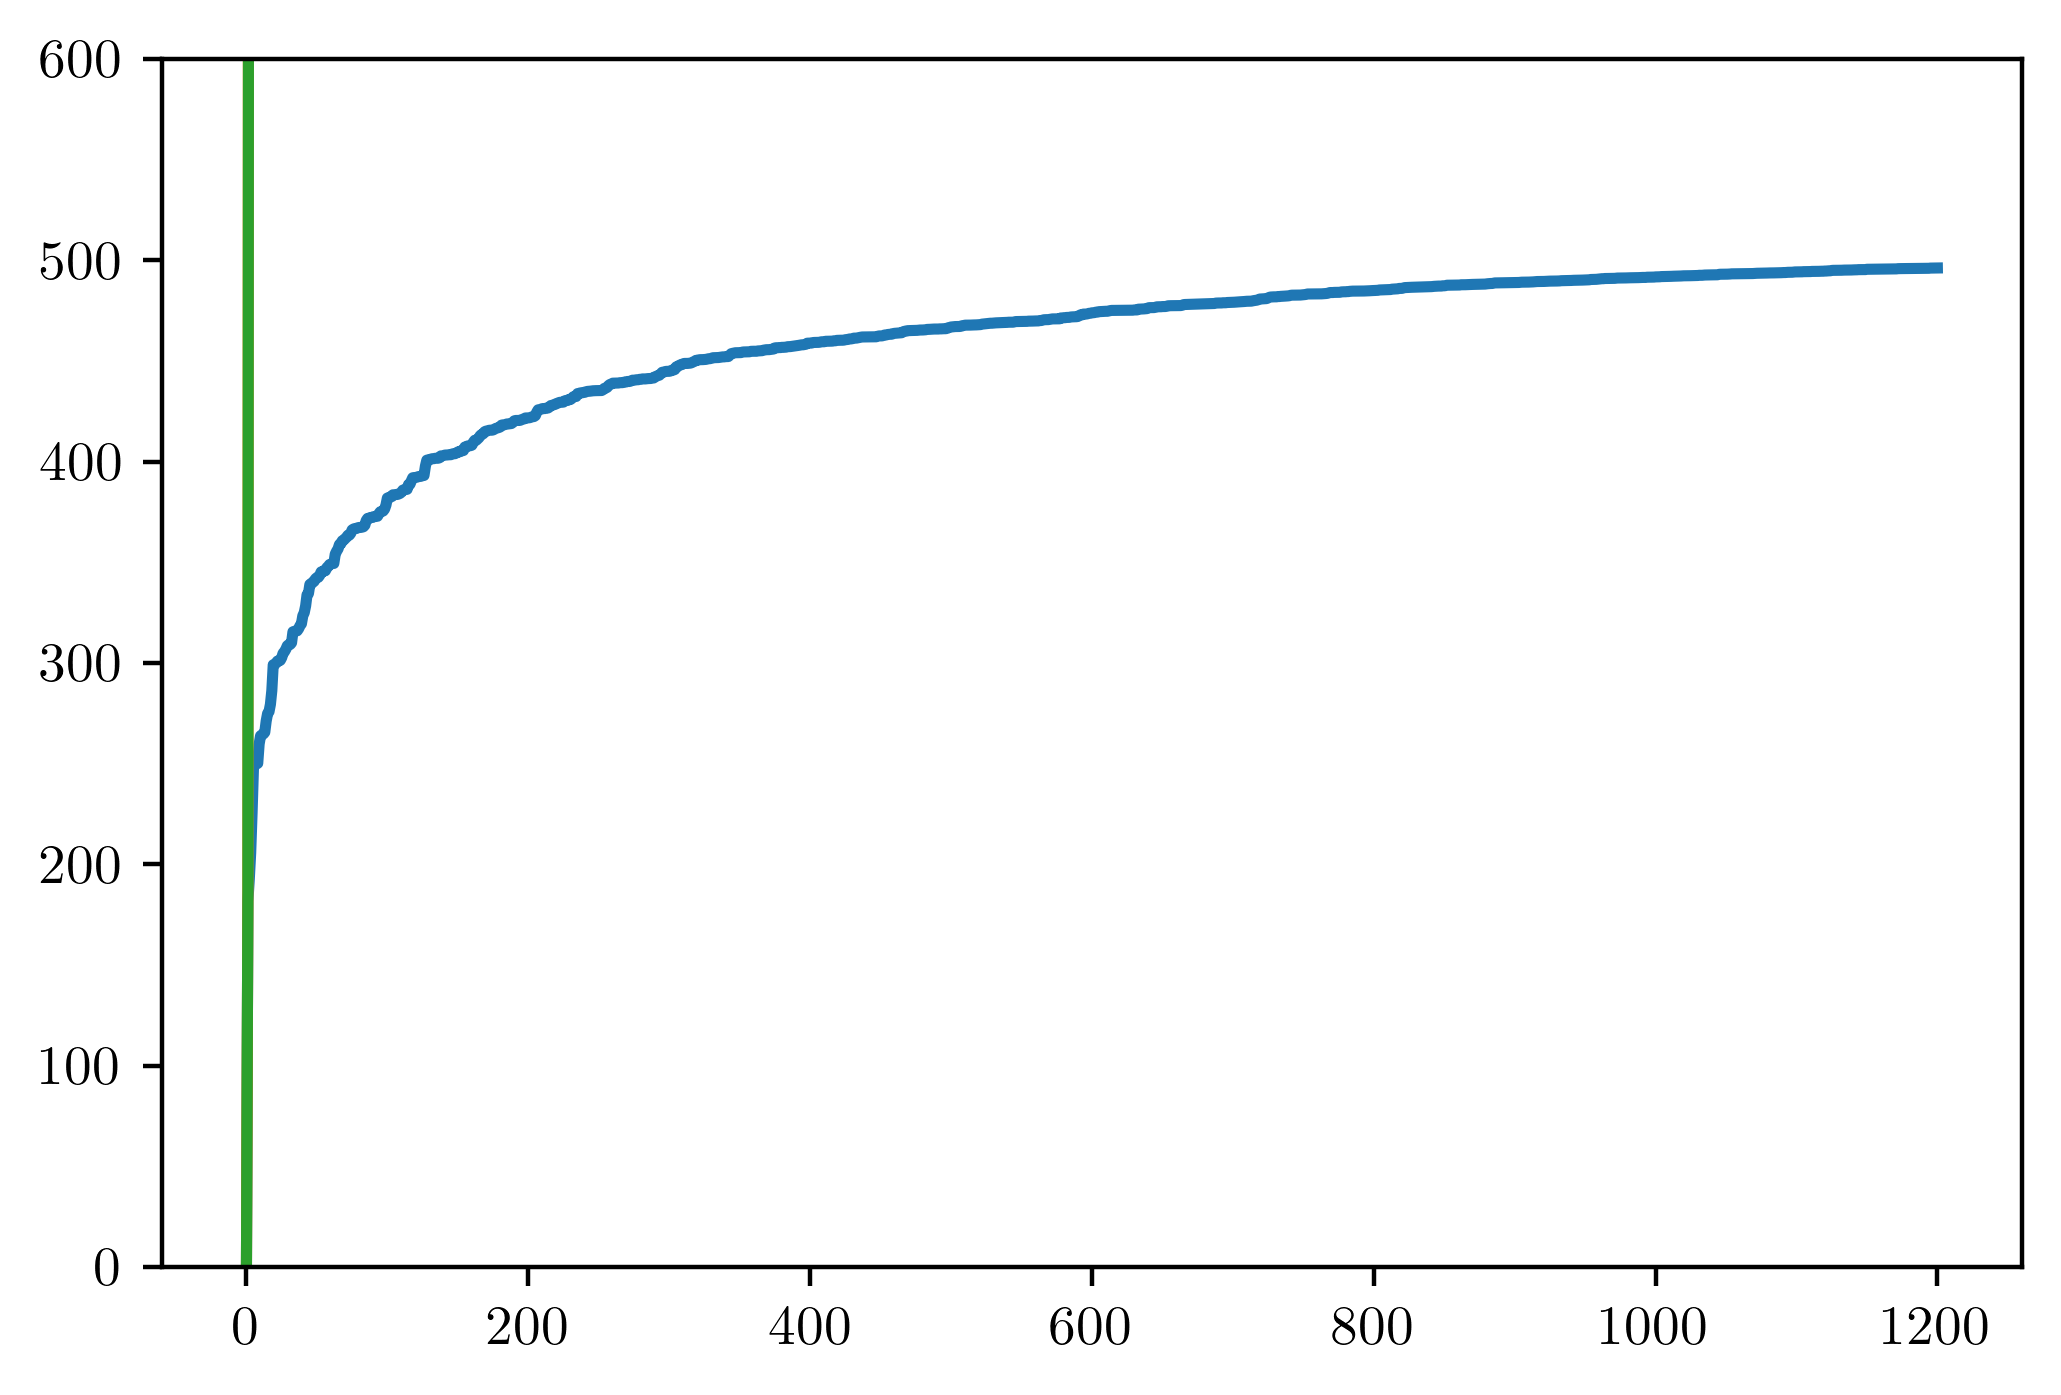

In [11]:
bench.plotRegret()

plt.ylim(0, 600)
import matplotlib
matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20)
#plt.xlim(0, 800)

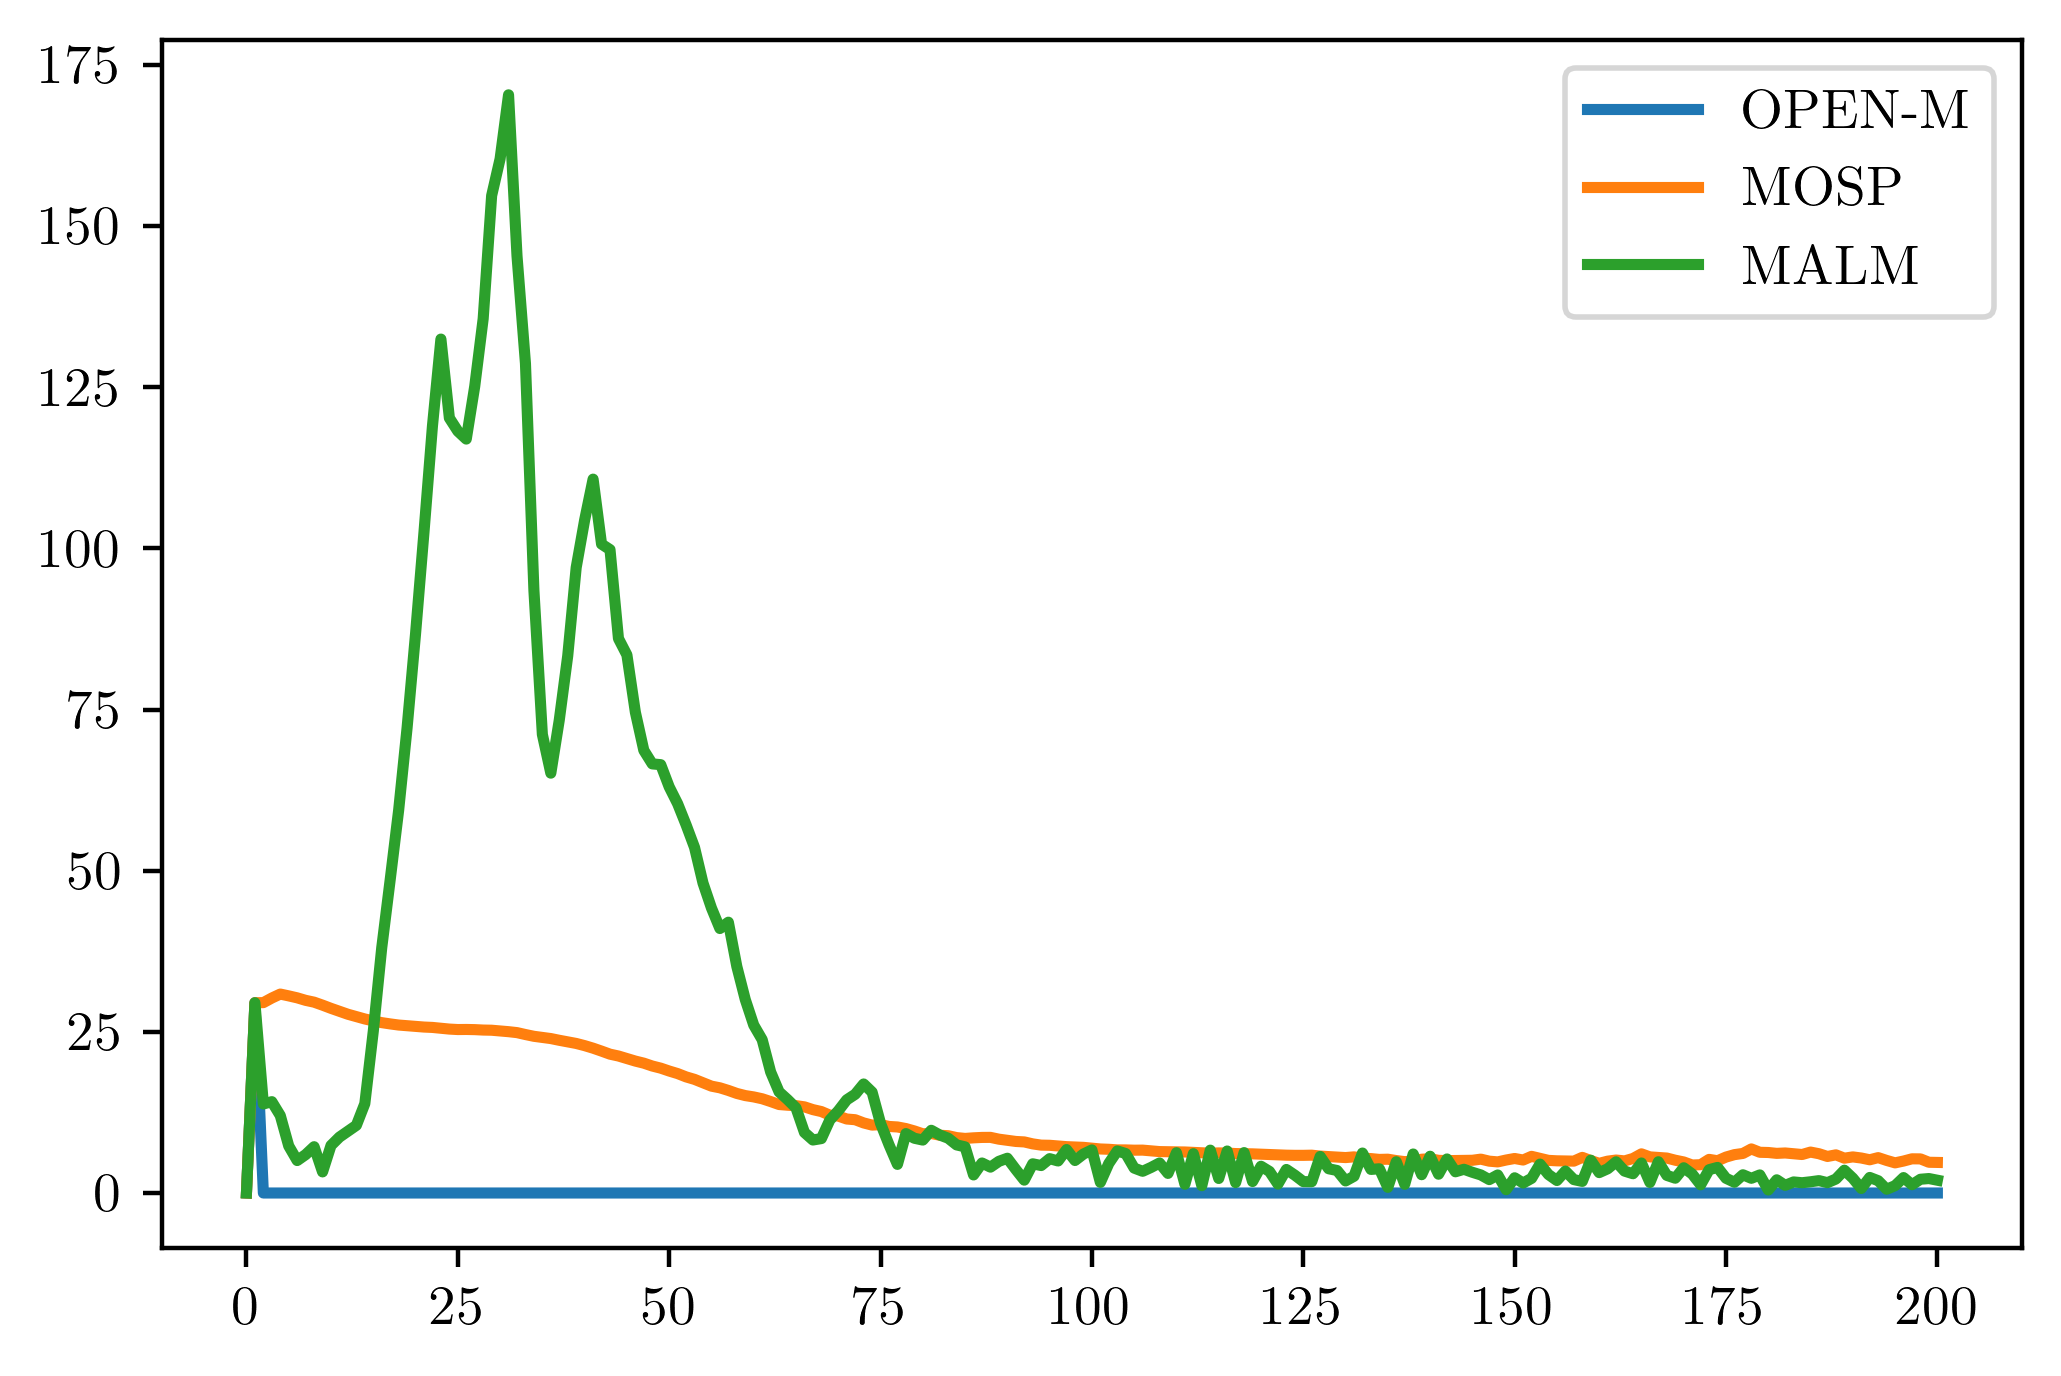

In [7]:
bench.plot('violation')
plt.legend()

In [7]:
newt = bench.algo[0]
lang = bench.algo[2]
newt.getX()
lang.getX()

[-10.593334644583706,
 -10.79580553029992,
 -9.705151598794115,
 -9.492831667113988,
 -10.493364335761463]

In [18]:
bench.prob.violation(newt.getX())
bench.prob.getA()@newt.getX()-bench.prob.getb().T

array([[ 7.10542736e-15, -3.55271368e-15,  0.00000000e+00,
        -3.55271368e-15]])

In [16]:
bench.prob.getb()

array([[-10.],
       [ -5.],
       [-11.],
       [-25.]])

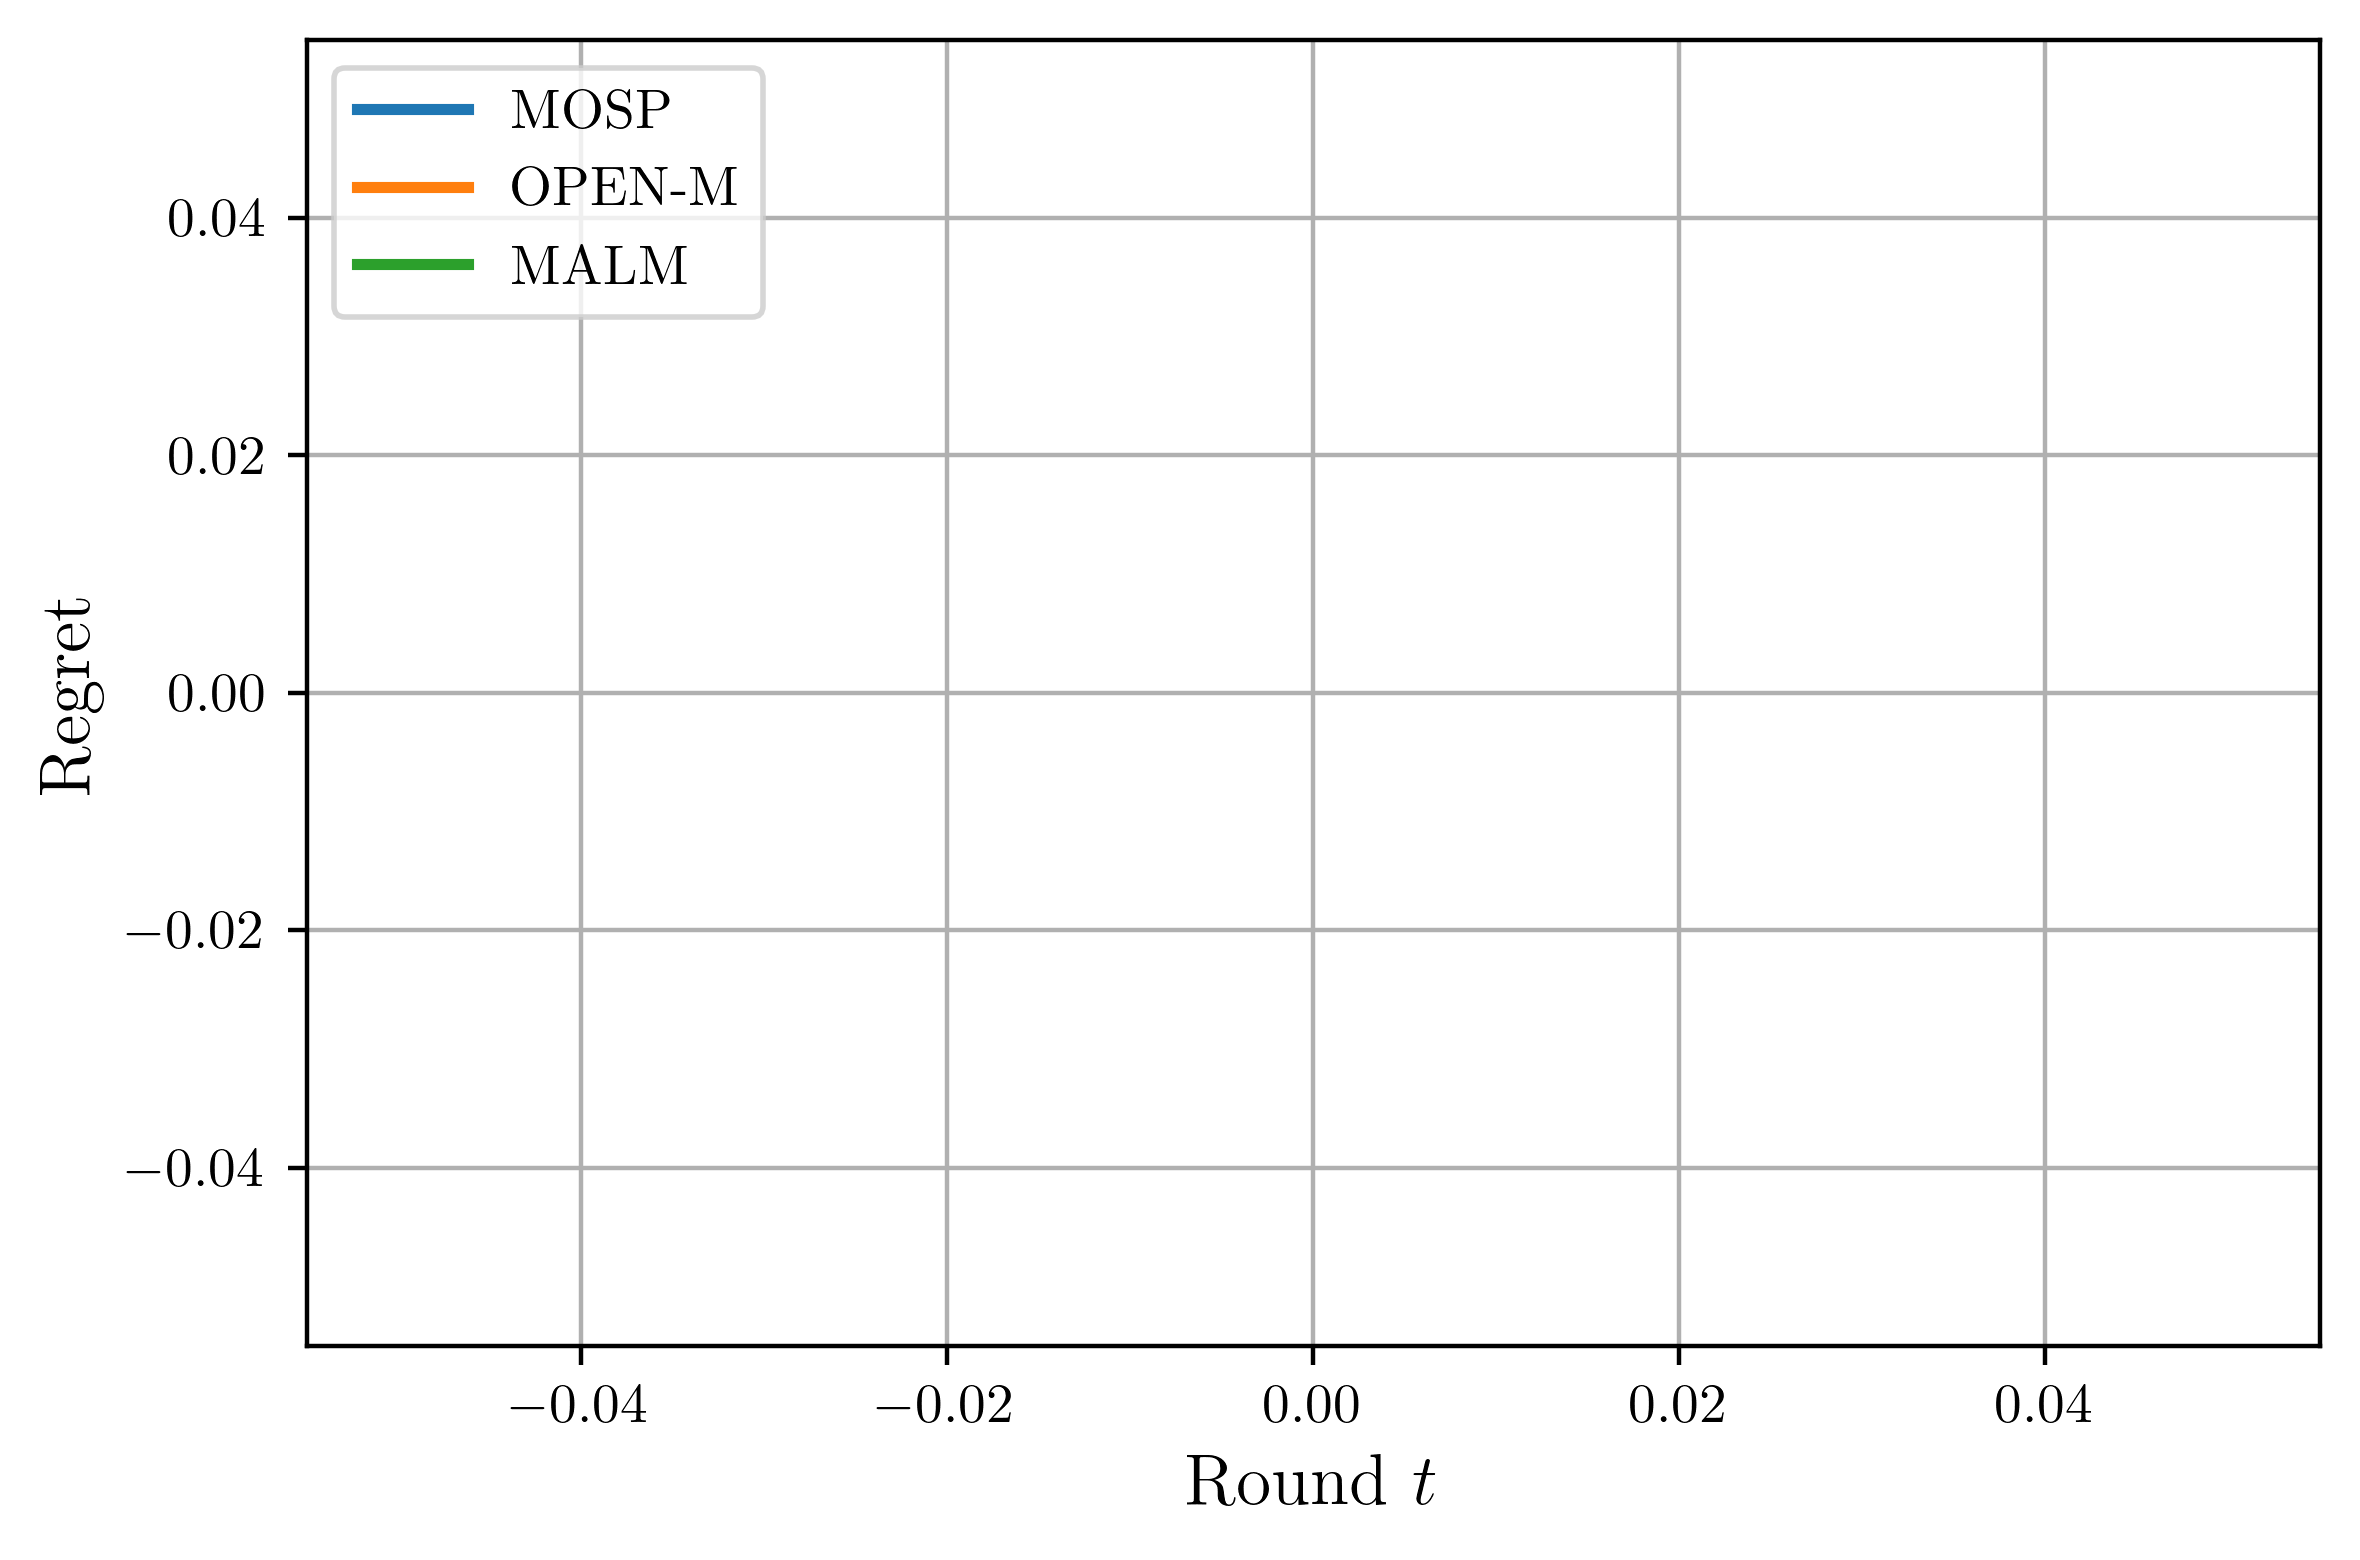

In [12]:
bench2.plotRegret()

plt.legend(loc=2)
plt.grid()
plt.ylabel(r'Regret', fontsize=13)
plt.xlabel(r'Round $t$', fontsize=13)
plt.tight_layout()
plt.autoscale(enable=True, axis='x', tight=False)

In [14]:
plt.plot(bench.Taxis, bench.data['OPEN-M']['regret'],linewidth=2.0,label=r'OPEN-M')
plt.plot(bench.Taxis, bench.data['MOSP']['regret'],linewidth=2.0,label=r'MOSP')
plt.plot(bench.Taxis, bench.data['MALM']['regret'],linewidth=2.0,label=r'MALM')
#plt.plot(bench2.Taxis, bench2.data['MOSP']['regret'],linewidth=2.0,label=r'MOSP')
#plt.plot(bench2.Taxis, bench2.data['OPENM']['regret'],linewidth=2.0,label=r'OPENM')

plt.legend(loc=2)
plt.grid()
plt.ylabel(r'Regret', fontsize=13)
plt.xlabel(r'Round $t$', fontsize=13)
plt.tight_layout()
plt.autoscale(enable=True, axis='x', tight=False)

KeyError: 'OPEN-M'

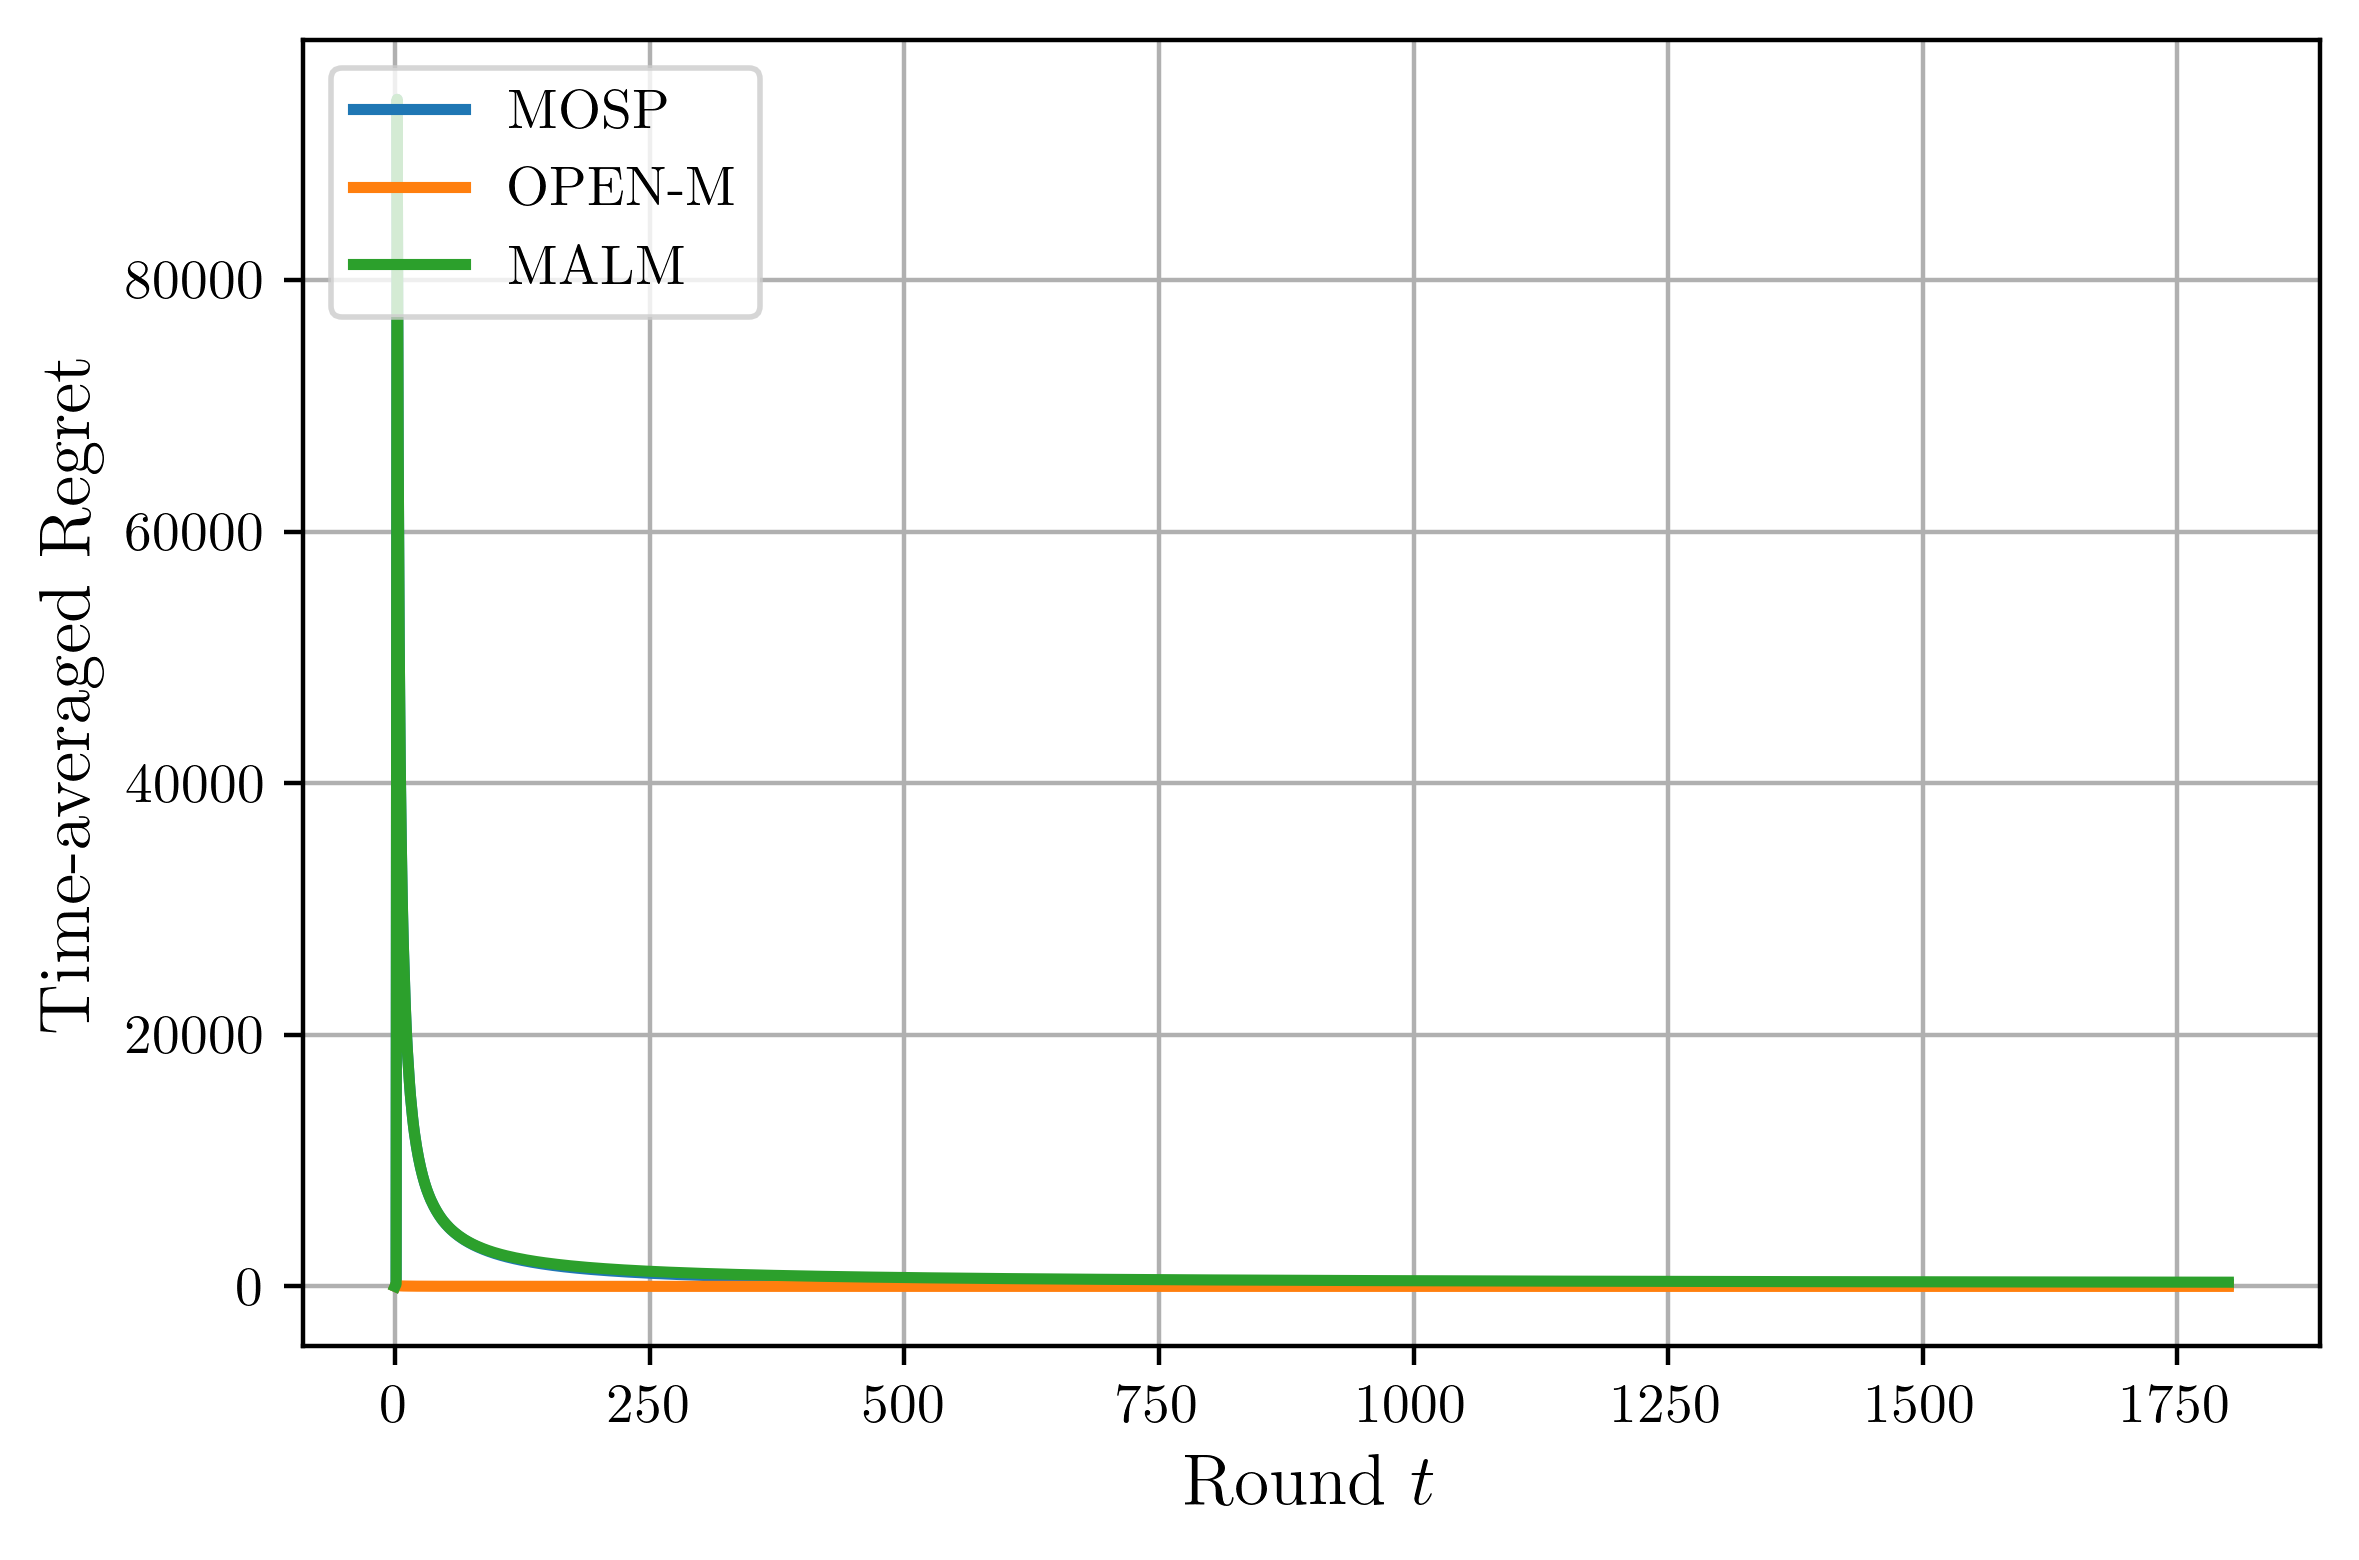

In [11]:
plt.plot(bench.Taxis, bench.data['MOSP']['avgRegret'],linewidth=2.0,label=r'MOSP')
plt.plot(bench.Taxis, bench.data['OPENM']['avgRegret'],linewidth=2.0,label=r'OPEN-M')
plt.plot(bench.Taxis, bench.data['Lagrangian']['avgRegret'],linewidth=2.0,label=r'MALM')
#plt.plot(bench2.Taxis, bench2.data['MOSP']['regret'],linewidth=2.0,label=r'MOSP')
#plt.plot(bench2.Taxis, bench2.data['OPENM']['regret'],linewidth=2.0,label=r'OPENM')

plt.legend(loc=2)
plt.grid()
plt.ylabel(r'Time-averaged Regret', fontsize=13)
plt.xlabel(r'Round $t$', fontsize=13)
plt.tight_layout()
plt.autoscale(enable=True, axis='x', tight=False)

In [4]:
cvxProb = prob2.optProblem()
cvxProb.solve()

3864.8000000000006